In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean

In [2]:
root_dir = '/Users/zcasparcohen/codes/NIW/data/'

In [3]:
PI_omega = xr.open_dataarray(root_dir+'roms_energy_transfers_500m.nc')
ds_filt = xr.open_dataset(root_dir+'roms_filtered_500m.nc')[['u','v','u_filtered','v_filtered']]
midlon,midlat=PI_omega.lon.median(),PI_omega.lat.median()

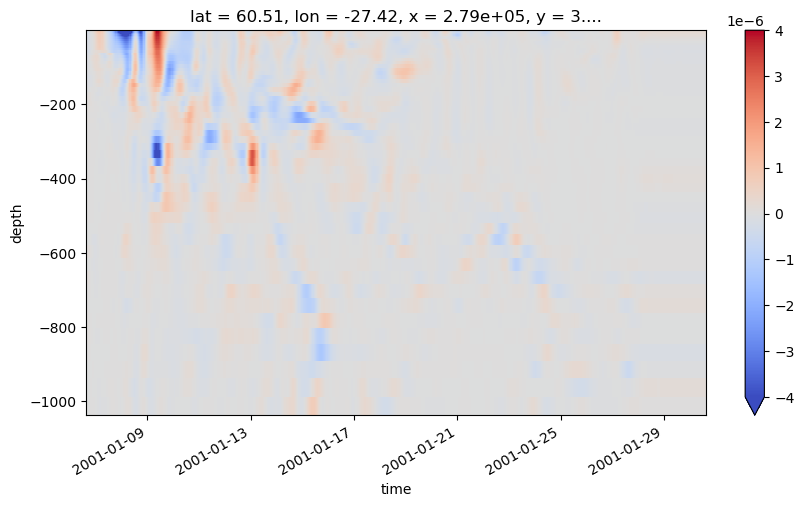

In [4]:
plt.figure(figsize=(10,5))
PI_omega.sel(lon=midlon,lat=midlat,method='nearest').plot(vmax=4e-6,cmap='coolwarm')

In [5]:
ds_filt['ke_filtered'] = 0.5*(ds_filt.u_filtered**2+ds_filt.v_filtered**2)

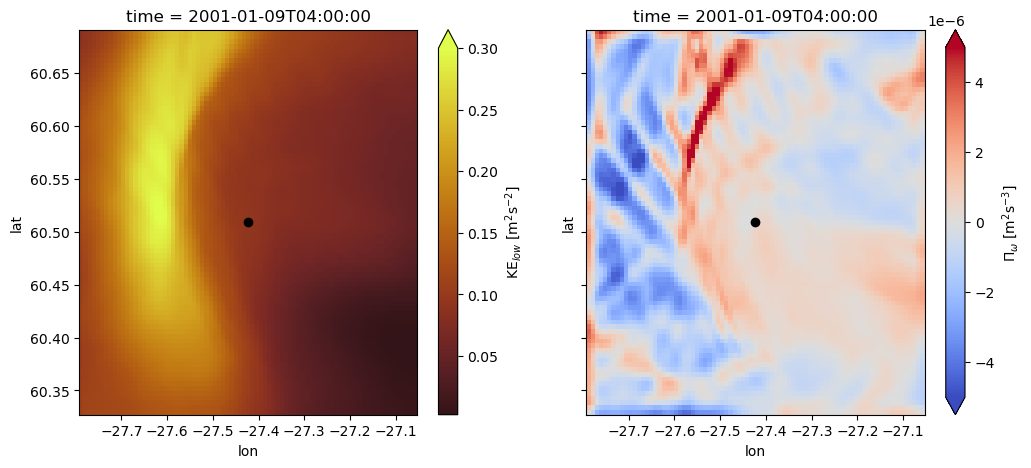

In [6]:
i=60
fig,axs = plt.subplots(1,2,figsize=(12,5),sharey=True)
ds_filt.ke_filtered.mean('depth').isel(time=i).plot(ax=axs[0],cmap=cmocean.cm.solar,vmax=3e-1,
                                                    cbar_kwargs={'label':r'KE$_{low}$ [m$^2$s$^{-2}$]'})
PI_omega.mean('depth').isel(time=i).plot(ax=axs[1],cmap='coolwarm',vmax=5e-6,cbar_kwargs={'label':r'$\Pi_{\omega}$ [m$^2$s$^{-3}$]'})
for ax in axs:
    ax.scatter(midlon,midlat,c='k')

In [7]:
figdir='/Users/zcasparcohen/codes/NIW/figures_vid/'

In [8]:
ds_filt['ke_high'] = 0.5*((ds_filt.u-ds_filt.u_filtered)**2+(ds_filt.v-ds_filt.v_filtered)**2)

In [14]:
for i,t in enumerate(ds_filt.time[:]):
    fig,axs = plt.subplots(1,3,figsize=(15,5),sharey=True)
    ds_filt.ke_filtered.isel(time=i,depth=0).plot(ax=axs[0],cmap=cmocean.cm.solar,vmax=5e-1,
                                                        cbar_kwargs={'label':r'KE$_{low}$ [m$^2$s$^{-2}$]'})
    ds_filt.ke_high.isel(time=i,depth=0).plot(ax=axs[1],cmap=cmocean.cm.solar,vmax=5e-1,
                                                        cbar_kwargs={'label':r'KE$_{high}$ [m$^2$s$^{-2}$]'})
    PI_omega.isel(time=i,depth=0).plot(ax=axs[2],cmap='coolwarm',vmax=5e-6,cbar_kwargs={'label':r'$\Pi_{\omega}$ [m$^2$s$^{-3}$]'})
    for ax in axs:
        ax.scatter(midlon,midlat,c='k')
    plt.savefig(figdir+'Pi_0m_t%s.png'%i)
    fig.clear();plt.close()

In [24]:
kef_avg = ds_filt.ke_filtered.mean('depth')
kef_high_avg = ds_filt.ke_high.mean('depth')
PI_omega_avg = PI_omega.mean('depth')

In [25]:
for i,t in enumerate(ds_filt.time[:]):
    fig,axs = plt.subplots(1,3,figsize=(15,5),sharey=True)
    kef_avg.isel(time=i).plot(ax=axs[0],cmap=cmocean.cm.solar,vmax=3e-1,
                                                        cbar_kwargs={'label':r'KE$_{low}$ [m$^2$s$^{-2}$]'})
    kef_high_avg.isel(time=i).plot(ax=axs[1],cmap=cmocean.cm.solar,vmax=3e-1,
                                                        cbar_kwargs={'label':r'KE$_{high}$ [m$^2$s$^{-2}$]'})
    PI_omega_avg.isel(time=i).plot(ax=axs[2],cmap='coolwarm',vmax=5e-6,cbar_kwargs={'label':r'$\Pi_{\omega}$ [m$^2$s$^{-3}$]'})
    for ax in axs:
        ax.scatter(midlon,midlat,c='k')
    plt.savefig(figdir+'Pi_mean_t%s.png'%i)
    fig.clear();plt.close()

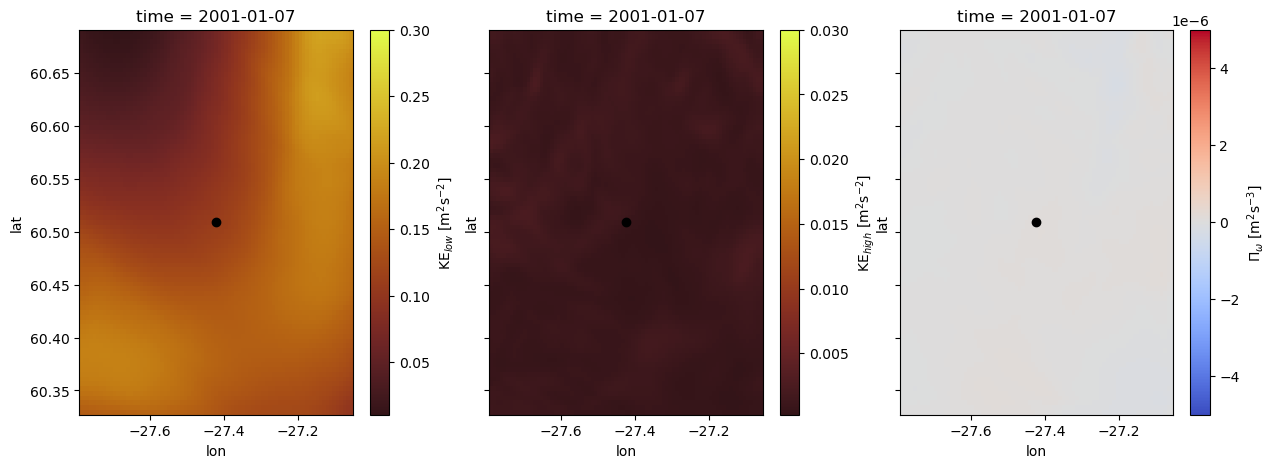

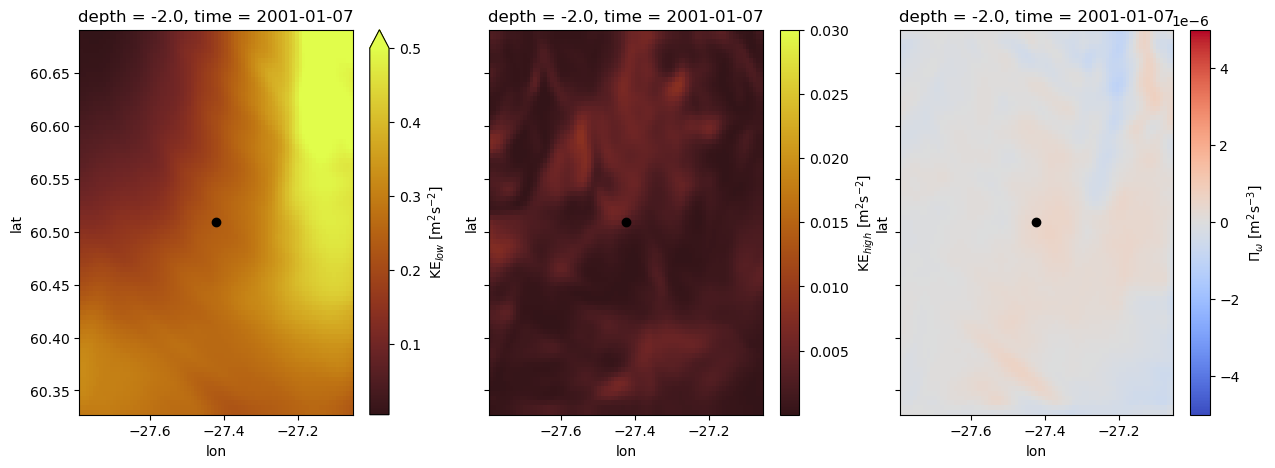

In [15]:
t='2001-01-07'
fig,axs = plt.subplots(1,3,figsize=(15,5),sharey=True)
ds_filt.ke_filtered.mean('depth').sel(time=t,method='nearest').plot(ax=axs[0],cmap=cmocean.cm.solar,vmax=3e-1,
                                                    cbar_kwargs={'label':r'KE$_{low}$ [m$^2$s$^{-2}$]'})
ds_filt.ke_high.mean('depth').sel(time=t,method='nearest').plot(ax=axs[1],cmap=cmocean.cm.solar,vmax=3e-2,
                                                    cbar_kwargs={'label':r'KE$_{high}$ [m$^2$s$^{-2}$]'})
PI_omega.mean('depth').sel(time=t,method='nearest').plot(ax=axs[2],cmap='coolwarm',vmax=5e-6,cbar_kwargs={'label':r'$\Pi_{\omega}$ [m$^2$s$^{-3}$]'})
for ax in axs:
    ax.scatter(midlon,midlat,c='k')

fig,axs = plt.subplots(1,3,figsize=(15,5),sharey=True)
ds_filt.ke_filtered.sel(depth=0,time=t,method='nearest').plot(ax=axs[0],cmap=cmocean.cm.solar,vmax=5e-1,
                                                    cbar_kwargs={'label':r'KE$_{low}$ [m$^2$s$^{-2}$]'})
ds_filt.ke_high.sel(depth=0,time=t,method='nearest').plot(ax=axs[1],cmap=cmocean.cm.solar,vmax=3e-2,
                                                    cbar_kwargs={'label':r'KE$_{high}$ [m$^2$s$^{-2}$]'})
PI_omega.sel(depth=0,time=t,method='nearest').plot(ax=axs[2],cmap='coolwarm',vmax=5e-6,cbar_kwargs={'label':r'$\Pi_{\omega}$ [m$^2$s$^{-3}$]'})
for ax in axs:
    ax.scatter(midlon,midlat,c='k')

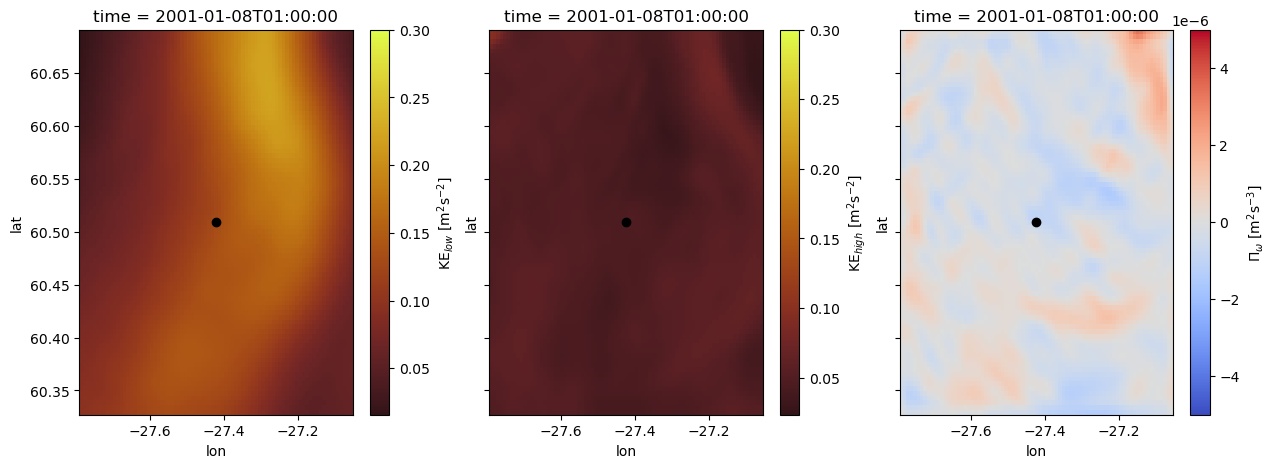

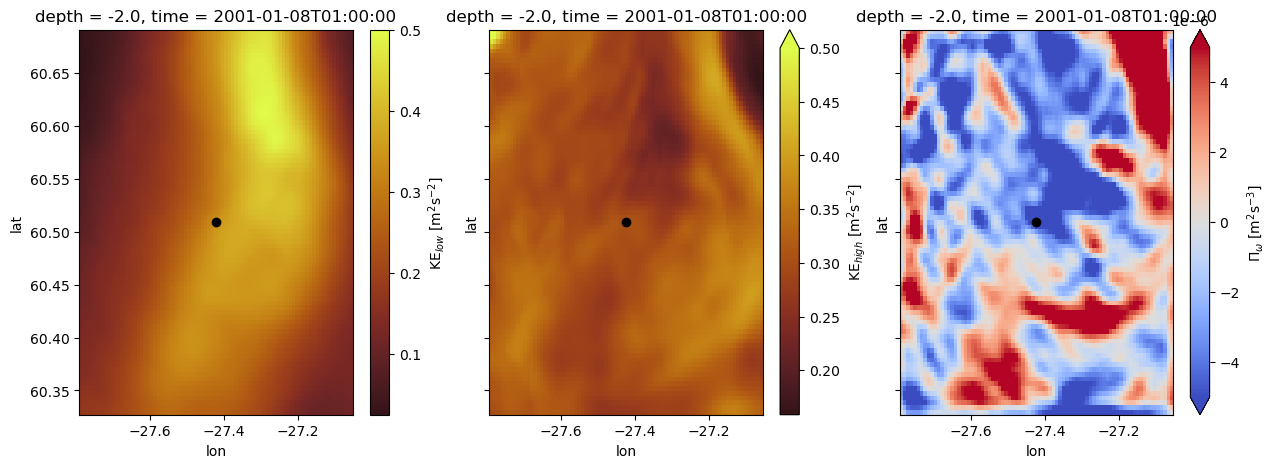

In [16]:
t='2001-01-08T01:00'
fig,axs = plt.subplots(1,3,figsize=(15,5),sharey=True)
ds_filt.ke_filtered.mean('depth').sel(time=t,method='nearest').plot(ax=axs[0],cmap=cmocean.cm.solar,vmax=3e-1,
                                                    cbar_kwargs={'label':r'KE$_{low}$ [m$^2$s$^{-2}$]'})
ds_filt.ke_high.mean('depth').sel(time=t,method='nearest').plot(ax=axs[1],cmap=cmocean.cm.solar,vmax=3e-1,
                                                    cbar_kwargs={'label':r'KE$_{high}$ [m$^2$s$^{-2}$]'})
PI_omega.mean('depth').sel(time=t,method='nearest').plot(ax=axs[2],cmap='coolwarm',vmax=5e-6,cbar_kwargs={'label':r'$\Pi_{\omega}$ [m$^2$s$^{-3}$]'})
for ax in axs:
    ax.scatter(midlon,midlat,c='k')

fig,axs = plt.subplots(1,3,figsize=(15,5),sharey=True)
ds_filt.ke_filtered.sel(depth=0,time=t,method='nearest').plot(ax=axs[0],cmap=cmocean.cm.solar,vmax=5e-1,
                                                    cbar_kwargs={'label':r'KE$_{low}$ [m$^2$s$^{-2}$]'})
ds_filt.ke_high.sel(depth=0,time=t,method='nearest').plot(ax=axs[1],cmap=cmocean.cm.solar,vmax=5e-1,
                                                    cbar_kwargs={'label':r'KE$_{high}$ [m$^2$s$^{-2}$]'})
PI_omega.sel(depth=0,time=t,method='nearest').plot(ax=axs[2],cmap='coolwarm',vmax=5e-6,cbar_kwargs={'label':r'$\Pi_{\omega}$ [m$^2$s$^{-3}$]'})
for ax in axs:
    ax.scatter(midlon,midlat,c='k')

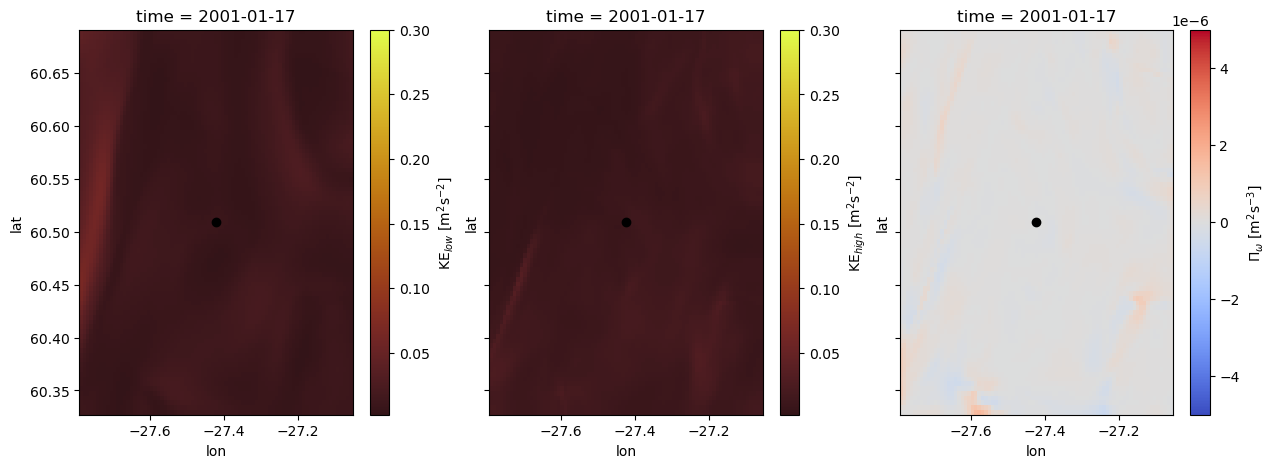

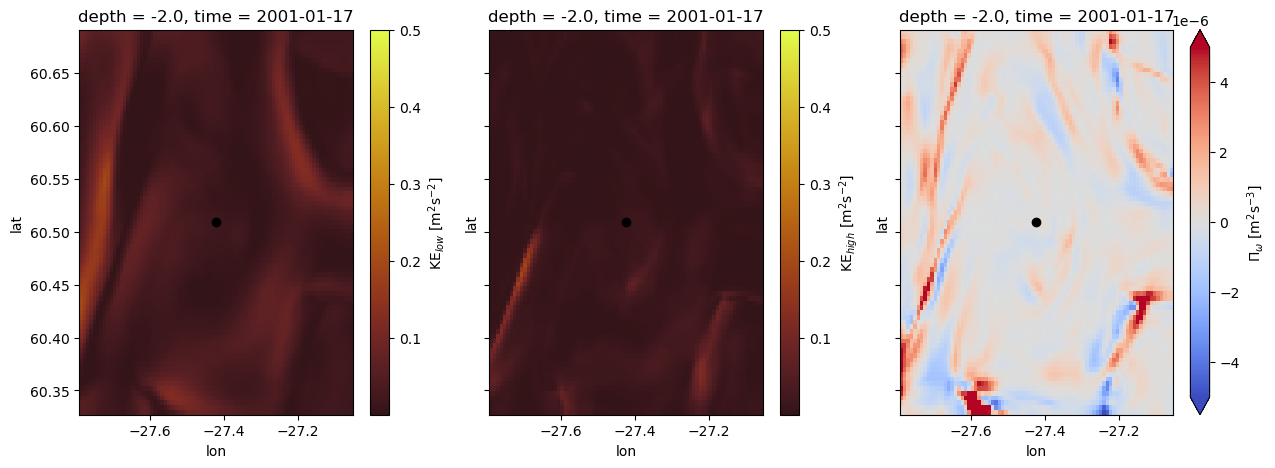

In [17]:
t='2001-01-17'
fig,axs = plt.subplots(1,3,figsize=(15,5),sharey=True)
ds_filt.ke_filtered.mean('depth').sel(time=t,method='nearest').plot(ax=axs[0],cmap=cmocean.cm.solar,vmax=3e-1,
                                                    cbar_kwargs={'label':r'KE$_{low}$ [m$^2$s$^{-2}$]'})
ds_filt.ke_high.mean('depth').sel(time=t,method='nearest').plot(ax=axs[1],cmap=cmocean.cm.solar,vmax=3e-1,
                                                    cbar_kwargs={'label':r'KE$_{high}$ [m$^2$s$^{-2}$]'})
PI_omega.mean('depth').sel(time=t,method='nearest').plot(ax=axs[2],cmap='coolwarm',vmax=5e-6,
                                                                  cbar_kwargs={'label':r'$\Pi_{\omega}$ [m$^2$s$^{-3}$]'})
for ax in axs:
    ax.scatter(midlon,midlat,c='k')

fig,axs = plt.subplots(1,3,figsize=(15,5),sharey=True)
ds_filt.ke_filtered.sel(depth=0,time=t,method='nearest').plot(ax=axs[0],cmap=cmocean.cm.solar,vmax=5e-1,
                                                    cbar_kwargs={'label':r'KE$_{low}$ [m$^2$s$^{-2}$]'})
ds_filt.ke_high.sel(depth=0,time=t,method='nearest').plot(ax=axs[1],cmap=cmocean.cm.solar,vmax=5e-1,
                                                    cbar_kwargs={'label':r'KE$_{high}$ [m$^2$s$^{-2}$]'})
PI_omega.sel(depth=0,time=t,method='nearest').plot(ax=axs[2],cmap='coolwarm',vmax=5e-6,cbar_kwargs={'label':r'$\Pi_{\omega}$ [m$^2$s$^{-3}$]'})
for ax in axs:
    ax.scatter(midlon,midlat,c='k')

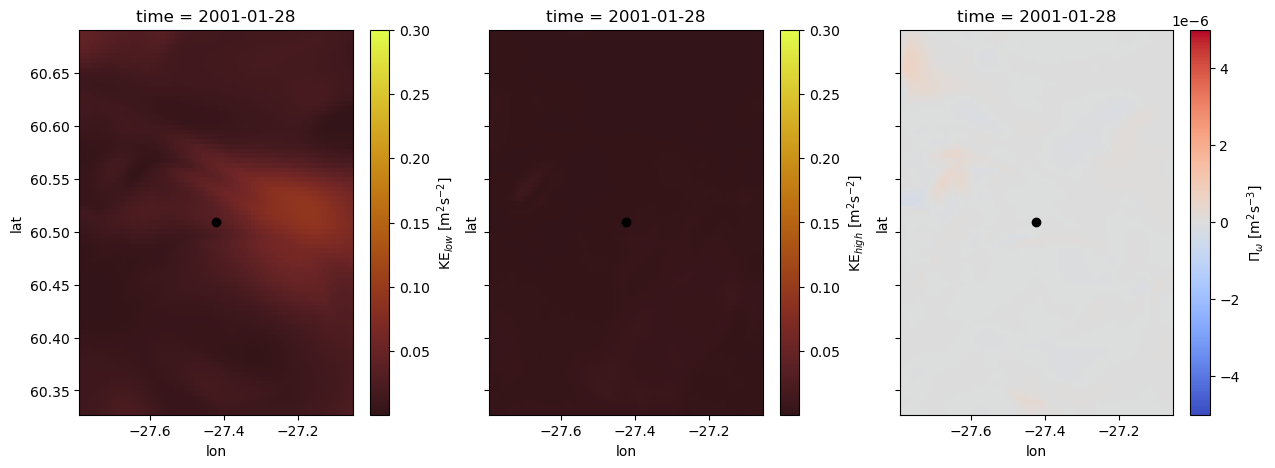

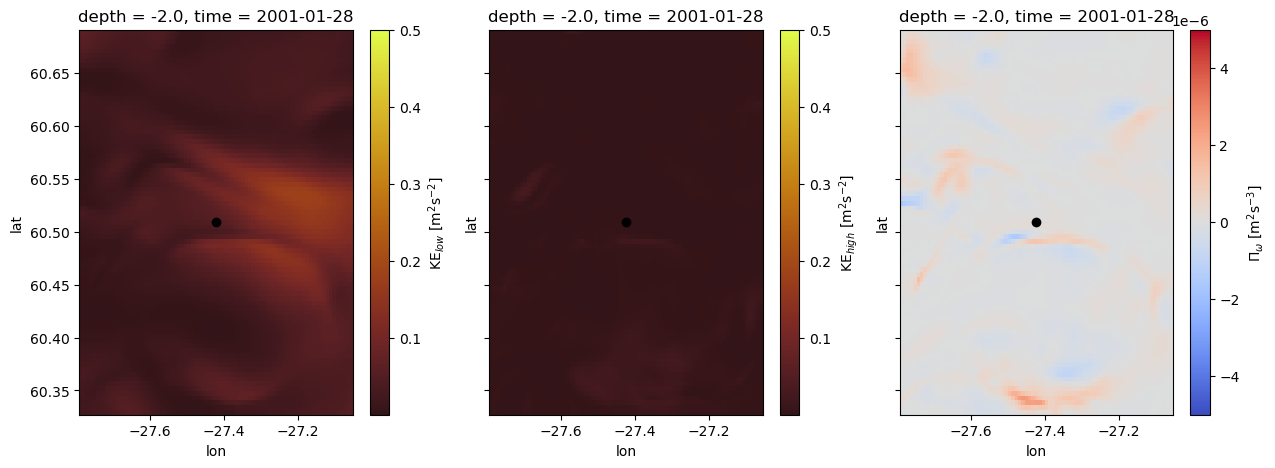

In [19]:
t='2001-01-28'
fig,axs = plt.subplots(1,3,figsize=(15,5),sharey=True)
ds_filt.ke_filtered.mean('depth').sel(time=t,method='nearest').plot(ax=axs[0],cmap=cmocean.cm.solar,vmax=3e-1,
                                                    cbar_kwargs={'label':r'KE$_{low}$ [m$^2$s$^{-2}$]'})
ds_filt.ke_high.mean('depth').sel(time=t,method='nearest').plot(ax=axs[1],cmap=cmocean.cm.solar,vmax=3e-1,
                                                    cbar_kwargs={'label':r'KE$_{high}$ [m$^2$s$^{-2}$]'})
PI_omega.mean('depth').sel(time=t,method='nearest').plot(ax=axs[2],cmap='coolwarm',vmax=5e-6,cbar_kwargs={'label':r'$\Pi_{\omega}$ [m$^2$s$^{-3}$]'})
for ax in axs:
    ax.scatter(midlon,midlat,c='k')

fig,axs = plt.subplots(1,3,figsize=(15,5),sharey=True)
ds_filt.ke_filtered.sel(depth=0,time=t,method='nearest').plot(ax=axs[0],cmap=cmocean.cm.solar,vmax=5e-1,
                                                    cbar_kwargs={'label':r'KE$_{low}$ [m$^2$s$^{-2}$]'})
ds_filt.ke_high.sel(depth=0,time=t,method='nearest').plot(ax=axs[1],cmap=cmocean.cm.solar,vmax=5e-1,
                                                    cbar_kwargs={'label':r'KE$_{high}$ [m$^2$s$^{-2}$]'})
PI_omega.sel(depth=0,time=t,method='nearest').plot(ax=axs[2],cmap='coolwarm',vmax=5e-6,cbar_kwargs={'label':r'$\Pi_{\omega}$ [m$^2$s$^{-3}$]'})
for ax in axs:
    ax.scatter(midlon,midlat,c='k')